In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read file
file_path = '/Users/zhazk/Desktop/Nielsen Intern/Composite_Score.xlsx'  
data = pd.read_excel(file_path)


In [12]:
# Prepare the independent variables (predictor variables) and the dependent variable (outcome variable)
X = data[['Program Factor', 'DE&I Factor', 'Type weight Factor', 'Popularity Perdiction Factor']]
y = data['Composite Score']

In [13]:
# Add the constant term (intercept)
X = sm.add_constant(X)

In [14]:
# Perform linear regression analysis
model = sm.OLS(y, X).fit()

In [15]:
# Print the regression analysis results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Composite Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.878e+12
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:43:04   Log-Likelihood:                 8132.6
No. Observations:                 616   AIC:                        -1.626e+04
Df Residuals:                     611   BIC:                        -1.623e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [24]:
# R
r_squared = model.rsquared
print(f"R-squared: {r_squared}")

# standard errors
standard_errors = model.bse
print(f"Standard Errors: \n{standard_errors}")

# p-value
p_values = model.pvalues
print(f"P-values: \n{p_values}")


R-squared: 0.9999999999827952
Standard Errors: 
const                           4.652170e-08
Program Factor                  6.236190e-08
DE&I Factor                     5.856530e-08
Type weight Factor              6.575068e-07
Popularity Perdiction Factor    1.193237e-07
dtype: float64
P-values: 
const                           1.509819e-11
Program Factor                  0.000000e+00
DE&I Factor                     0.000000e+00
Type weight Factor              0.000000e+00
Popularity Perdiction Factor    0.000000e+00
dtype: float64


In [25]:
# Calculate the predicted composite score
data['predicted_score'] = model.predict(X)

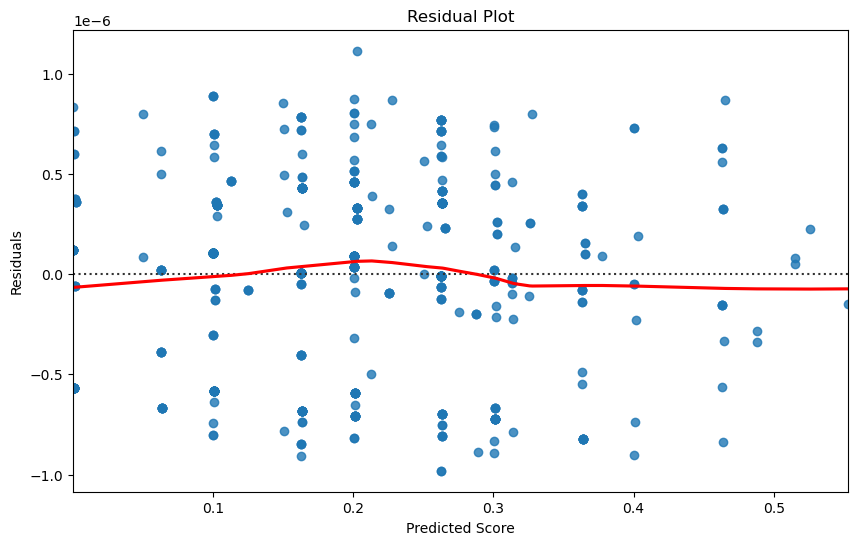

Plot saved as /Users/zhazk/Desktop/Taxonomy/residual_plot.png


In [31]:
plt.figure(figsize=(10, 6))
sns.residplot(x=data['predicted_score'], y=data['Composite Score'], lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Score')
plt.ylabel('Residuals')
output_file_path = '/Users/zhazk/Desktop/Taxonomy/residual_plot.png' 
plt.savefig(output_file_path, bbox_inches='tight')
plt.show()
print(f"Plot saved as {output_file_path}")
plt.show()

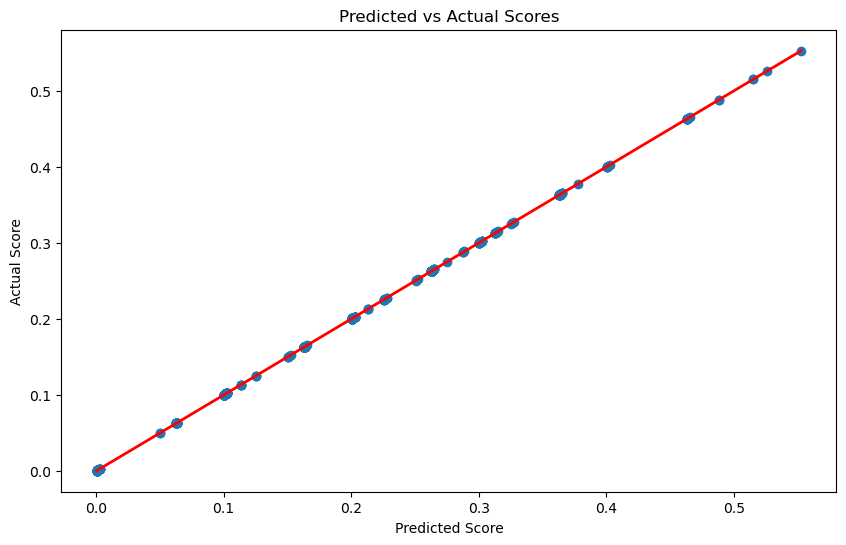

In [32]:
# Plot a scatter plot of predicted values versus actual values
plt.figure(figsize=(10, 6))
plt.scatter(data['predicted_score'], data['Composite Score'])
plt.plot([data['predicted_score'].min(), data['predicted_score'].max()],
         [data['Composite Score'].min(), data['Composite Score'].max()], color='red', linewidth=2)
plt.title('Predicted vs Actual Scores')
plt.xlabel('Predicted Score')
plt.ylabel('Actual Score')
output_file_path = '/Users/zhazk/Desktop/Taxonomy/residual_actual_plot.png' 
plt.savefig(output_file_path, bbox_inches='tight')
plt.show()

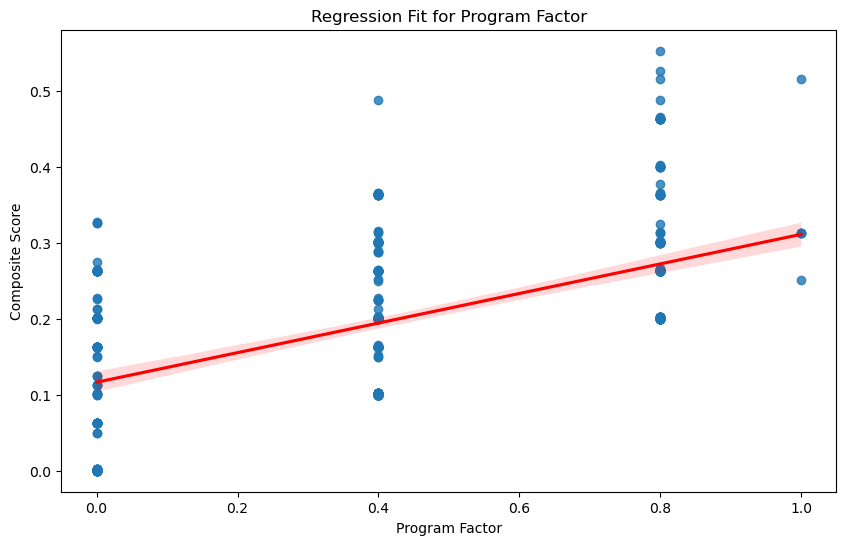

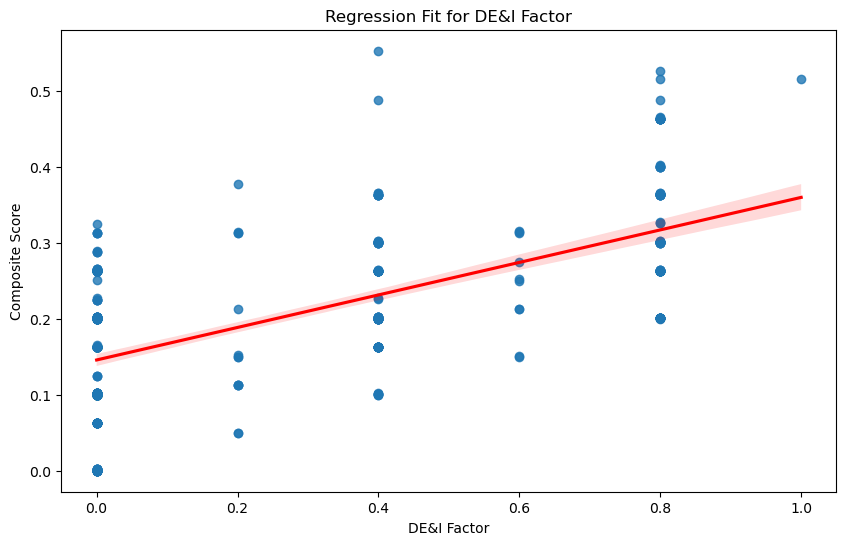

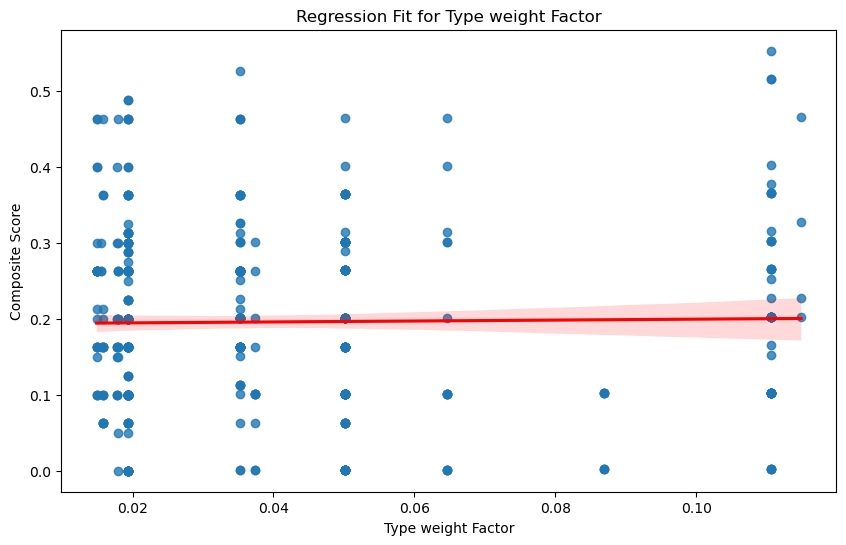

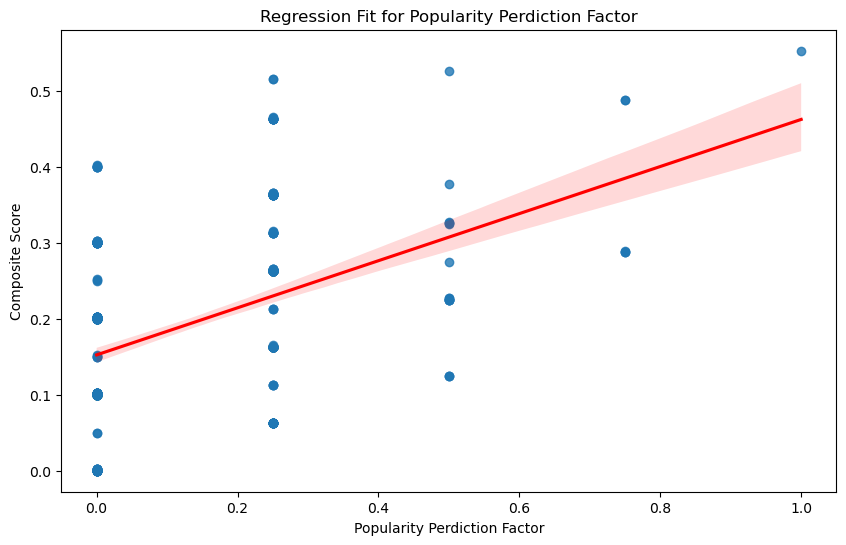

In [28]:
 #Plot the regression model's fit line
for factor in ['Program Factor', 'DE&I Factor', 'Type weight Factor', 'Popularity Perdiction Factor']:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=data[factor], y=data['Composite Score'], line_kws={'color': 'red'})
    plt.title(f'Regression Fit for {factor}')
    plt.xlabel(factor)
    plt.ylabel('Composite Score')
    plt.show()

In [30]:
# save file
output_file_path = '/Users/zhazk/Desktop/processed_keywords_with_regression.xlsx'  # 替换为你希望保存的文件路径
data.to_excel(output_file_path, index=False)

print(f"Data has been saved to {output_file_path}")

Data has been saved to /Users/zhazk/Desktop/processed_keywords_with_regression.xlsx
